In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA
import utils
import pickle

In [2]:
# prefered magic functions for jupyter notebook
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [4]:

# get paths to attached zarr files of ME frames, and pkl files of meta data
zarr_files = utils.find_files(root_dir = '/root/capsule/data', endswith='zarr')
pkl_files = utils.find_files(root_dir = '/root/capsule/data', endswith='.pkl', return_dir=False)
meta_obj = utils.load_pickle_file(pkl_files[0])

In [6]:
### Use object to compute and plot PCs
from PCAgenerator import PCAgenerator
me_pca = PCAgenerator(zarr_files[0], crop_region=(250, 300,  400, 500)) # testing one file, with a specified crop window
ipca, pca_motion_energy = me_pca._apply_pca_to_motion_energy_without_dask()

Loaded frames (221611, 492, 658)
Applying crop to ME frames (250, 300, 400, 500)


  0%|          | 0/2217 [00:00<?, ?it/s]

Standardizing data...
Fitting PCA in chunks...
processing 221610 number of frames
starting at 1 frame.


100%|█████████▉| 2215/2217 [25:28<00:01,  1.52it/s]

Processing last chunk, shape: (110, 150, 200)


  0%|          | 3/2217 [00:00<01:46, 20.71it/s]

PCA fitting complete.
Transforming data in chunks...


  1%|          | 13/2217 [00:00<00:17, 128.87it/s]

transform last 221501
pc shape (221610, 100)
Added PCA results.
Computing spatial masks...
length of PCs is 221610
length of frames is 221610
Processing 0th PC


  1%|          | 17/2217 [00:00<00:13, 164.85it/s]

Processing last chunk, shape: (10, 150, 200)
Processing 1th PC


  1%|          | 17/2217 [00:00<00:13, 164.61it/s]

Processing last chunk, shape: (10, 150, 200)
Processing 2th PC


100%|█████████▉| 2216/2217 [00:13<00:00, 165.98it/s]


Processing last chunk, shape: (10, 150, 200)
Done.
saving tmp object after fitting for quicker debugging


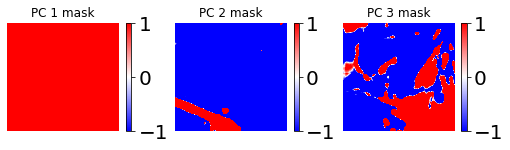

In [7]:
#standardized frames and standardized masks
#these were made for full frames but pca was computed on cropped frame
fig = me_pca._plot_spatial_masks()

In [8]:
def crop_frames(me_pca, frames_me):
        """
        Crops the input frames based on the defined crop region.
        
        Parameters:
        - frames_me (numpy.ndarray): 3D array of frames with shape (num_frames, height, width)
        
        Returns:
        - numpy.ndarray: Cropped frames
        - int: Cropped height
        - int: Cropped width
        """
        crop_y_start, crop_x_start, crop_y_end, crop_x_end = me_pca.crop_region
        frames_me = frames_me[:, crop_y_start:crop_y_end, crop_x_start:crop_x_end]
        H = crop_y_end - crop_y_start
        W = crop_x_end - crop_x_start
        return frames_me, H, W

In [10]:
me_pca.crop_region

(250, 300, 400, 500)

In [11]:
import zarr
me_store = zarr.DirectoryStore(zarr_files[0])
zarr_group = zarr.open(me_store, mode='r')
frames_me = zarr_group['data']
frames_me, H, W = crop_frames(me_pca, frames_me)

In [14]:
me_pca.standardizeMasks=True

In [15]:
me_pca._add_spatial_masks(me_pca.pca_motion_energy, frames_me)

  1%|          | 15/2217 [00:00<00:15, 144.21it/s]

Computing spatial masks...
length of PCs is 221610
length of frames is 221610
Will standardize PC mask values for plotting.
Processing 0th PC


  1%|          | 16/2217 [00:00<00:14, 151.29it/s]

Processing last chunk, shape: (10, 150, 200)
Processing 1th PC


  1%|          | 16/2217 [00:00<00:14, 154.07it/s]

Processing last chunk, shape: (10, 150, 200)
Processing 2th PC


100%|█████████▉| 2216/2217 [00:14<00:00, 151.01it/s]

Processing last chunk, shape: (10, 150, 200)
Done.


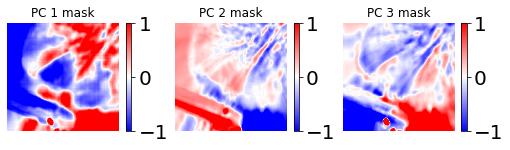

In [16]:
# standardized mask and data, cropped frame
fig = me_pca._plot_spatial_masks()

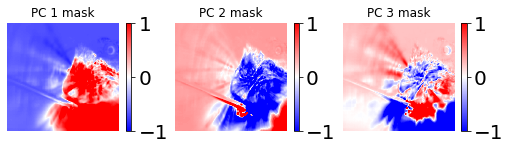

In [15]:
#standardized frames and standardized masks
#these were made for full frames but pca was computed on cropped frame
fig = me_pca._plot_spatial_masks()

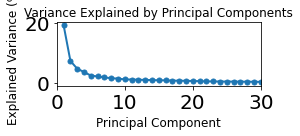

In [18]:
fig = me_pca._plot_explained_variance()

In [25]:
me_pca._

In [22]:
from PCAgenerator import PCAgenerator
me_pca = PCAgenerator(zarr_files[0], crop = True, crop_region=(250, 300,  400, 500), standardize4PCA=False, standardizeMasks=True) # testing one file, with a specified crop window
ipca, pca_motion_energy = me_pca._apply_pca_to_motion_energy_without_dask()

Loaded frames (221611, 492, 658)
Applying crop to ME frames (250, 300, 400, 500)


  0%|          | 0/2217 [00:00<?, ?it/s]

Fitting PCA in chunks...
processing 221610 number of frames
starting at 1 frame.


100%|█████████▉| 2215/2217 [24:23<00:01,  1.51it/s]

Processing last chunk, shape: (110, 150, 200)


  0%|          | 3/2217 [00:00<01:36, 22.99it/s]

PCA fitting complete.
Transforming data in chunks...


  1%|          | 13/2217 [00:00<00:17, 123.09it/s]

transform last 221501
pc shape (221610, 100)
Added PCA results.
Computing spatial masks...
length of PCs is 221610
length of frames is 221610
Will standardize PC mask values for plotting.
Processing 0th PC


  1%|          | 16/2217 [00:00<00:14, 154.95it/s]

Processing last chunk, shape: (10, 150, 200)
Processing 1th PC


  1%|          | 16/2217 [00:00<00:13, 157.86it/s]

Processing last chunk, shape: (10, 150, 200)
Processing 2th PC


100%|█████████▉| 2216/2217 [00:14<00:00, 156.13it/s]


Processing last chunk, shape: (10, 150, 200)
Done.
saving tmp object after fitting for quicker debugging


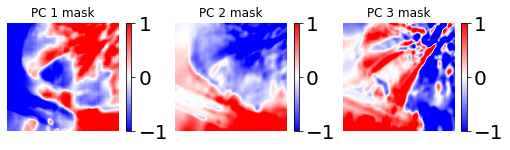

In [24]:
# not standardized frames, standardized mask
fig = me_pca._plot_spatial_masks()

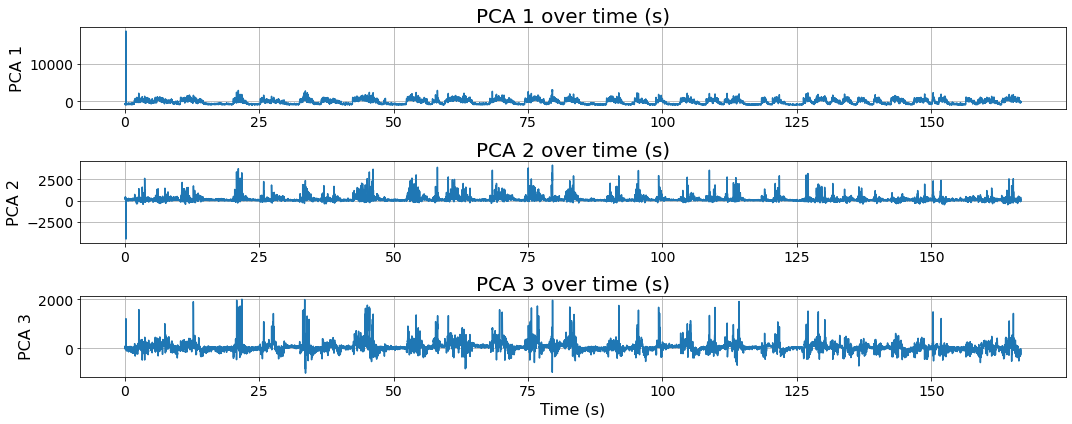

In [34]:
fig =me_pca._plot_pca_components_traces()

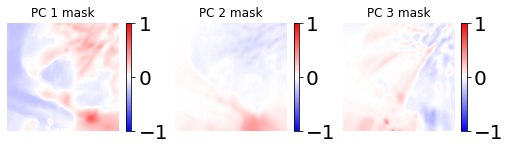

In [ ]:
# not standardized frames, standardized mask (short video)
# could be lighter also due to inclussion of noisy first frame?
fig = me_pca.plot_spatial_masks()

In [30]:
 import json
 def load_metadata(me_pca):
        """Load metadata from the Zarr store."""
        root_group = zarr.open_group(me_pca.motion_zarr_path, mode='r')
        metadata = json.loads(root_group.attrs['metadata'])
        me_pca.loaded_metadata = metadata
        return me_pca

In [31]:
me_pca = load_metadata(me_pca)

In [35]:
me_pca.loaded_metadata

{'video_path': '/root/capsule/data/multiplane-ophys_749315_2024-11-20_14-58-05/behavior-videos/1406189591_Nose_20241120T145749.mp4',
 'fps': 60,
 'chunk_size': 100,
 'width': 658,
 'height': 492,
 'total_frames': 221612,
 'video_info': {'Recording Report Version': '1.0',
  'Acquisition DateTime': '11/20/24 15:59:22',
  'MVR Version': '1.1.7',
  'CameraIndex': 'Camera 4',
  'CameraLabel': 'Nose',
  'CameraID': 'DEV_000F315C24C5',
  'FPS': 60.0024,
  'CameraGain': 5,
  'CustomInitialExposureTime': 4,
  'CustomInitialNumberOfFrames': 10,
  'ExposureTime': 1,
  'ImageDimensions': '658x492',
  'BinningFactors': '1x1',
  'MovieID': 'dd6f0b5e-a792-11ef-904b-ac1f6b3c2dda',
  'VideoOutputFileName': 'C:\\ProgramData\\AIBS_MPE\\mvr\\data\\.\\1406189591_Nose_20241120T145749.mp4',
  'Codec': 'h264_nvenc',
  'FrameID imprint enabled': 'false',
  'ApproximateFileSize': '903036.896 KB',
  'h264': {'CRF': '17', 'Preset': 'medium', 'HardwareAcceleration': 'cuvid'},
  'FFMPEGInputPixelFormat': 'gray',
  